<h1 style="font-size:40px;"><center>Exercise I:<br> Multi-layer perceptrons
for classification and regression problems.
</center></h1>


# Short summary
In this exercise you will: 

* train MLPs and for both classification and regression problems
* overfit models and see how overfitting changes validation performance
* avoid overfitting using regularization
* do model selection

There are 13 questions in this exercise. These 13 questions can be found in six different cells below (see section "The Different Cells"). All of the exercises deal with training and evaluation of the multi-layer perceptron (MLP) network. You are going to work with different datasets, binary and multiple classification problems and a regression problem. For most questions, code is available that you can run directly or only need to make small modifications to. For two questions we only provide parts of the code and you should provide the rest. However, it is typically just a matter of paste and copy from the previous code cells (in a proper way).

You should write the report of the exercise within this notebook. The details of how to do that can be found below in section "Writing the report". Finally before you start:

**Deadline for submitting the report: December 10, 12:00 (2019)**

## The data
There are several datasets in this exercise. 

### syn1 - syn3
Three different synthetic classification problems will be used. They are all 2D binary classification problems which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. They are called *syn1, syn2* and *syn3*. Each of these datasets are generated "on the fly" each time. They come from various normal distributions. Since they are generated using random numbers it means that each time you generate the data it will be slightly different from next time. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot these datasets.

### regr1
There is also a synthetic regression problem, called *regr1*. It has 6 inputs (independent variables) and one output variable (dependent variable). It is generated according to the following formula:  

$\qquad d = 2x_1 + x_2x_3^2 + e^{x_4} + 5x_5x_6 + 3\sin(2\pi x_6) + \alpha\epsilon$  
    
where $\epsilon$ is added normally distributed noise and $\alpha$ is a parameter controlling the size of the added noise. Variables $x_1,...,x_4$ are normally distrubuted with zero mean and unit variance, whereas $x_5, x_6$ are uniformly distributed ($[0,1]$). The target value $d$ has a non-linear dependence on ***x***.

### Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

### Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29. 
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. This is, in summary, a 9-class classification problem with 12 input values for each case.

### Bioconcentration dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/QSAR+Bioconcentration+classes+dataset* In short, this is a dataset of manually-curated bioconcentration factors (BCF) for 779 chemicals used to determine the mechanisms of bioconcentration, i.e. to predict whether a chemical: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated. Data were randomly split into a training set of 584 compounds (75%) and a test set of 195 compounds (25%), preserving the proportion between the classes. The independent variables consist of 9 molecular descriptors. This is, in summary, a 3-class classification problem with 9 input values for each case.

## The exercises
There are 13 questions, where the first 5 questions are dealing with 2D binary classification problems. Here you will be able to see the boundary implemented by the different MLPs that you train. Questions 6-9 deals with training a regression network for the *regr1* dataset. Here you are also going to use regularization to "combat" overtraining. Question 10-11 deals with Japanese vowels classification problem, here your task is to come up with a model that optimizes the validation result. Question 13 is for the Bioconcentration dataset, and again you should come up with a good model. Finally, the last exercise is to find a model that can solve the spiral problem.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | MLP | Needed | Defines the MLP model |
| 3 | Data | Needed | Defines the functions to generate the artificial datasets |
| 4 | PlotData | Information | Plots the 2D classification datasets |
| 5 | Statistics | Needed | Defines the functions that calculates various performance measures |
| 6 | Boundary | Needed | Function that can show 2D classification boundaries | 
| 7 | Confusion | Needed | Functions that plots the confusion matrix | 
| 8 | Ex1 | Exercise | For question 1 |
| 9 | Ex2 | Exercise | For question 2-5 |
| 10 | Ex3 | Exercise | For question 6-9 |
| 11 | Ex4 | Exercise | For question 10-11 |
| 12 | Ex5 | Exercise | For question 12 |
| 13 | Ex6 | Exercise | For question 13 |

In order for you to start with the exercise you need to run all cells with the celltype "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" or "Run all above" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun!

---

### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries

In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import metrics, regularizers, optimizers
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import scipy as sp
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, log_loss, classification_report
import pandas as pd

### CellName: MLP (#2)
### CellType: Needed
### Cell instruction: Defining the MLP model

This cell defines the MLP model. There are a number of parameters that is needed to 
define a model. Here is a list of them: **Note:** They can all be specified when you call
this function in later cells. The ones specified in this cell are the default values.

* inp_dim: the input dimension (integer)

* n_nod: size of the network, eg [5] for a one hidden layer with 5 nodes and [5,3] for a two layer network with 5 and 3 hidden nodes each.

* drop_nod: Dropout parameter for each hidden layer. You can specipty a single number that will be used for all hidden layers. If you want different dropout parameters for each hidden layer, then specify as a list. Example, for a two hidden layer network drop_nod = [0.5, 0.75] means drop hidden nodes with probability 0.5 and 0.75 for the first and the second hidden layer, respectively. 

* act_fun: the activation function. Most common are
    * 'linear'
    * 'relu'
    * 'tanh'
    * 'sigmoid'
        
* out_act_fun: the activation function for the output nodes. Most common are
    * 'linear'
    * 'sigmoid'
    * 'softmax'
    
* opt_method: The error minimization method. Common choices
    * 'SGD'
    * 'Adam'
    * 'Nadam'
    * 'RMSprop'
    
* cost_fun: The error function used during training. There are three common ones
    * 'mean_squared_error'
    * 'binary_crossentropy'
    * 'categorical_crossentropy'

* lr_rate: The learning rate. 

* lambd: L2 regularization parameter

* num_out: The number of output nodes

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
def mlp(inp_dim,
            n_nod,
            drop_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for i, nod in enumerate(n_nod):
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        if type(drop_nod) is list: 
            X = Dropout(drop_nod[i])(X)
        else: 
            X = Dropout(drop_nod)(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate, clipnorm = 1.0),
                  loss = cost_fun,
                  metrics=['accuracy'])   
    
    return model



### CellName: Data (#3)
### CellType: Needed
### Cell instruction: Defining synthetic data sets

This cell defines the three different synthetic data sets and the regression dataset. It also provides functions for reading the Vowles dataset and the Spiral data. The last function is used for standardization of the data. Run the cell by entering into the cell and press "CTRL Enter".

In [3]:
def syn1(N):
    
    global seed
    
    x = np.empty(shape=(N,2), dtype = np.float32)  
    d = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)
  
    x[:N1,0] = 4 + np.random.normal(loc=.0, scale=1., size=(N1))
    x[N1:,0] = -4 + np.random.normal(loc=.0, scale=1., size=(N-N1))
    x[:,1] = 10*np.random.normal(loc=.0, scale=1., size=(N))
        
    # Target
    d[:N1] = np.ones(shape=(N1,))
    d[N1:] = np.zeros(shape=(N-N1,))
    
    # Rotation
    theta = np.radians(30)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]]) # rotation matrix
    x = np.dot(x,R) 
    
    return x,d


def syn2(N):
    
    global seed
     
    x = np.empty(shape=(N,2), dtype = np.float32)  
    d = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    x[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))

    # Negative samples 
    x[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    # Target
    d[:N1] = np.ones(shape=(N1,))
    d[N1:] = np.zeros(shape=(N-N1,))

    return x,d


def syn3(N):

    global seed
    
    x = np.empty(shape=(N,2), dtype = np.float32)  
    d = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(2*N/3)
    
    # disk
    teta_d = np.random.uniform(0, 2*np.pi, N1)
    inner, outer = 2, 5
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N1))
    x[:N1,0], x[:N1,1] = r2*np.cos(teta_d), r2*np.sin(teta_d)
        
    # circle
    teta_c = np.random.uniform(0, 2*np.pi, N-N1)
    inner, outer = 0, 3
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N-N1))
    x[N1:,0], x[N1:,1] = r2*np.cos(teta_c), r2*np.sin(teta_c)
    
    # Target
    d[:N1] = np.ones(shape=(N1,))
    d[N1:] = np.zeros(shape=(N-N1,))
    
    return x, d


def regr1(N, v=0):

    global seed

    x = np.empty(shape=(N,6), dtype = np.float32)  
    
    uni = lambda n : np.random.uniform(0,1,n)
    norm = lambda n : np.random.normal(0,1,n)
    noise =  lambda  n : np.random.normal(0,1,n)
    
    
    for i in range(4):
        x[:,i] = norm(N)
    for j in [4,5]:
        x[:,j] = uni(N)
    
    d =   2*x[:,0] + x[:,1]* x[:,2]**2 + np.exp(x[:,3]) + \
            5*x[:,4]*x[:,5]  + 3*np.sin(2*np.pi*x[:,5])
    std_signal = np.std(d)
    d = d + v * std_signal * noise(N)
        
    return x, d

def twospirals(n_points, turns = 3, noise=0.5):
    """
     Returns the two spirals dataset.
    """
    n = (np.random.rand(n_points,1)*0.95+0.05) * turns * (2*np.pi)
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

def vowels():
    
    def pre_proc(file_name):
        block = []
        x = []
    
        with open(file_name) as file:
            for line in file:    
                if line.strip():
                    numbers = [float(n) for n in line.split()]
                    block.append(numbers)
                else:
                    x.append(block)
                    block = []
                
        ################################
        x = [np.asarray(ar) for ar in x]    
        return x

    x_trn = pre_proc('ae.train')
    x_tst = pre_proc('ae.test')

    
    ############## LABELS###########
    chunk1 = list(range(30,270, 30))
    d_trn = []
    person = 0

    for i, block in enumerate(x_trn):
        if i in chunk1:
            person += 1
        d_trn.extend([person]*block.shape[0])
        
    chunk2 = [31,35,88,44,29,24,40,50,29]
    chunk2 = np.cumsum(chunk2)
    d_tst = []
    person = 0
    for i, block in enumerate(x_tst):
        if i in chunk2:
            person += 1
        d_tst.extend([person]*block.shape[0])

    x_trn = np.vstack(x_trn)
    x_tst = np.vstack(x_tst)
    
    ## Split into train, validation and test
    num_classes = 9
    d_trn = keras.utils.to_categorical(d_trn, num_classes)
    d_tst = keras.utils.to_categorical(d_tst, num_classes)

    from sklearn.model_selection import train_test_split
    x_tst, x_val, d_tst, d_val = train_test_split(x_tst, d_tst, test_size=0.4, random_state=41)

    return x_trn, d_trn, x_val, d_val, x_tst, d_tst

def bcf():

    bcf_trn = pd.read_csv("Grisoni_trn.csv", delimiter='\t')
    bcf_tst = pd.read_csv("Grisoni_tst.csv", delimiter='\t')

    x_trn = bcf_trn.iloc[:,3:12].values.astype(np.float32)
    d_trn = bcf_trn.iloc[:,12].values.astype(np.float32) - 1.0
    d_trn = keras.utils.to_categorical(d_trn, 3)

    x_tst = bcf_tst.iloc[:,3:12].values.astype(np.float32)
    d_tst = bcf_tst.iloc[:,12].values.astype(np.float32) - 1.0
    d_tst = keras.utils.to_categorical(d_tst, 3)
    
    return x_trn, d_trn, x_tst, d_tst

def standard(x):
    return np.mean(x, axis=0) , np.std(x, axis=0)
    

### CellName: PlotData (#4)
### CellType: Information
### Cell instruction: Plotting the data

Here we just generate 100 cases for syn1-syn3 and the spiral dataset and plot them. Run the cell by entering into the cell and press "CTRL Enter". 

**Note!** This cell is not needed for the actual exercises, it is just to visualize the four different 2D synthetic classification data sets.

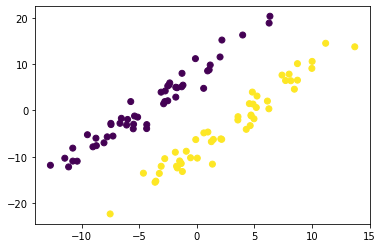

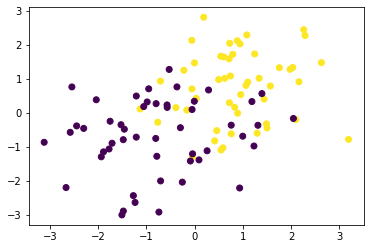

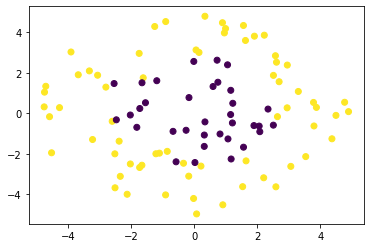

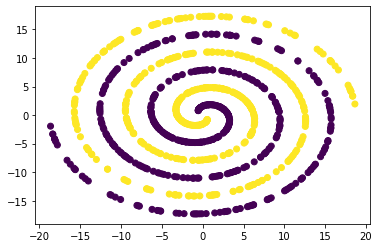

In [4]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

x,d = syn1(100)
plt.figure(1)
plt.scatter(x[:,0],x[:,1], c=d)

x,d = syn2(100)
plt.figure(2)
plt.scatter(x[:,0],x[:,1], c=d)


x,d = syn3(100)
plt.figure(3)
plt.scatter(x[:,0],x[:,1], c=d)


x,d = twospirals(500, 3, 0)
plt.figure(4)
plt.scatter(x[:,0],x[:,1], c=d)


### CellName: Statistics (#5)
### CellType: Needed
### Cell instruction: Present result for both classification and regression problems

This cell defines two functions that we are going to call using a trained model to calculate both error and performance measures. Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    sens = tp / nof_p
    spec = tn / nof_n
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Sensitivity', 'Specificity', 'Loss']
    B = [acc, sens, spec, loss[0]]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.4f}'.format(A[i], B[i]))

    return print('\n','#'*50)

def stats_reg(d = None, d_pred = None, label = 'Training', estimat = None):
    
    A = ['MSE', 'CorrCoeff']
    
    pcorr = np.corrcoef(d, d_pred)[1,0]
    
    if label.lower() in ['training', 'trn', 'train']:
        mse = estimat.history['loss'][-1]
    else:
        mse = estimat.history['val_loss'][-1] 

    B = [mse, pcorr]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.4f}'.format(A[i], B[i]))

    return print('\n','#'*50)


### CellName: Confusion (#6)
### CellType: Needed
### Cell Instruction: Plot the confusion matrix

This cell defines the functions need to plot a confusion matrix. A confusion matrix is a summary of the predictions made by a classifier. Each column of the matrix represents the instances of the predicted class while each row represents the instances of the actual class. The function 'plot_confusion_matrix' does the actual plotting, while the 'make_cm_plot' is the one that should be called from the user. See example of usage in the exercises. Run the cell by entering into the cell and press "CTRL Enter".

In [6]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def make_cm_plot(model,
            inp,
            trg,
            num_classes,
            label='Test data'):
    
    print('\n','#'*10,'Result for {} Data'.format('Test'), '#'*10, '\n')

    y = model.predict(inp, verbose=0 )
    print('log_loss:   ', '{:.4f}'.format(log_loss(trg, y, eps=1e-15)))

    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    print('accuracy:   ', '{:.4f}'.format((y_class==d_class).mean()), '\n')

    class_names = ['class {}'.format(i+1) for i in range(num_classes)]
    print(classification_report(d_class, y_class, target_names=class_names))

    confuTst = confusion_matrix(d_class, y_class)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = class_names,
                          title        = "Confusion Matrix: Test data")

    

### CellName: Boundary (#7)
### CellType: Needed
### Cell Instruction: Decision boundary

This cell defines the function to plot the decision boundary for a 2D input binary MLP classifier. Run the cell by entering into the cell and press "CTRL Enter".

In [7]:
def decision_b(X, Y1, model ):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # grid stepsize
    h = 0.025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    Z[Z>.5] = 1
    Z[Z<= .5] = 0

    Y_pr = model.predict(X, batch_size = X.shape[0], verbose=0).reshape(Y1.shape)
  
    Y = np.copy(Y1)
    Y_pr[Y_pr>.5] = 1
    Y_pr[Y_pr<= .5] = 0
    Y[(Y!=Y_pr) & (Y==0)] = 2
    Y[(Y!=Y_pr) & (Y==1)] = 3
    
    
    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha = .9) 
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker='+', c='k')
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker='o', c='k')
       
    plt.scatter(X[:, 0][Y==3], X[:, 1][Y==3], marker = '+', c='r')   
    plt.scatter(X[:, 0][Y==2], X[:, 1][Y==2], marker = 'o', c='r')
    
    
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.show()


---
End of "Needed" and "Information" cells. Below are the cells for the actual exercise.

---

### CellName: Ex1 (#8)
### CellType: Exercise
### Cell instruction: Instruction for question 1

The cell below should be used for question 1. You can run the cell as it is (i.e. CTRL-Return). However, looking at the code will help you understand how the network is created, trained and evaluated. It will be useful for the other questions.

#### Question 1

Use synthetic data 1 (syn1) (100 data points) and train a linear MLP to separate the two classes, i.e. use a single hidden node. **Why can you solve this problem with a single hidden node?**


#### Question 1 ANSWER:

A single note, means that there is only one layer which allows only to represent linear seperable functions. Due to us only having one linear decision plane it can be done by one node

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


C:\Users\ydg88\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


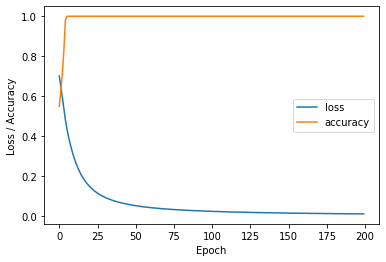

1886/1886 [==============================] - 3s 1ms/step


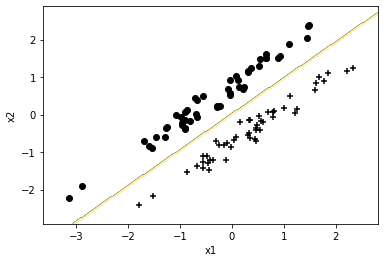

CPU times: total: 7.22 s
Wall time: 18.9 s


In [8]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None
    
# Generate training data
x_trn, d_trn = syn1(100)

# General standardization of input data 
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [1],                      # number of nodes in hidden layer
         'drop_nod': 0.0,                  # fraction of the input units to drop
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'SGD',               # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.5,                    # learningrate
         'num_out' : 1 } # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_ex1 = mlp(**INPUT)

# Print a summary of the model
model_ex1.summary()

# Train the model
estimator_ex1= model_ex1.fit(x_trn, d_trn,
                      epochs = 200,                     # Number of epochs
                      #validation_data=(x_val, d_val),  # We don't have any validation dataset!
                      batch_size = x_trn.shape[0],      # Use batch learning
                      #batch_size=25,                   
                      verbose = 0)

# Call the stats function to print out statistics for the training
# stats_class(x_trn, d_trn, 'Training', model_ex1)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Show the decision boundary
decision_b(x_trn, d_trn, model_ex1)


### CellName: Ex2 (#9)
### CellType: Exercise
### Cell instruction: Instruction for question 2-5

The cell below should be used for questions 2-5. For question 2 you can run the cell as it is (i.e. CTRL-Return). For the other questions you need to modify the cell in order to change data set, vary the size of the network etc. There are brief comments in the code that will guide you here.

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance?  For classification problems we will provide 4 different measurements as returned by a call to the *stats_class* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* loss = cross-entropy error (so low loss means good performance!)

Our suggestion for you is to either use accuracy or loss as your performance measure.

#### Question 2
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation datapoints. 

Now, use synthetic data 2 (syn2)(100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?** Note: Use a fixed random seed for this exercise since you will compare with runs in the next question.

#### Question 3
You are now going to overtrain the MLP! By increasing the number of hidden nodes we should be able to get better and better training performance. **How many hidden nodes do you need to reach an accuracy >95% on your training dataset?**

**Hint:** Overtraining here often means finding good local minimum of the error function, which may require some tuning of the learning parameters. This means that you may have to change the learning rate, increase the number of epochs and use "better" minimization methods. Since the *Adam* method is usually better than the vanilla *stochastic gradient descent*, it is therefore used in the cells below as the default minimizer. Also you may want to change the size of the "batch_size" parameter. It is by default using all data.

#### Question 4
Using the valdation data to optimize the model size. **What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** 

#### Question 5
Now you are going to use the *syn3* dataset. So, use **150** training datapoints from the synthetic dataset 3 and train an MLP to separate the two classes. Also use 1000 datapoints for validation. **How many nodes gives optimal performance on the validation data?** By looking at the data, one would expect to need at least 3 hidden neurons to separate the two classes. **Why?**
#### Question 1 ANSWER:

A single note, means that there is only one layer which allows only to represent linear seperable functions. Due to us only having one linear decision plane it can be done by one node
#### Question 2 Answer
Accuracy        0.8660
Loss            0.3089
#### Question 3 Answer

10 nodes
8 nodes with 0.7 learning rate instead of 0.07
#### Question 4 Answer

1 node

#### Question 5 Answer
3,3,1 gives 0.83-0.8550 accuracy, where 3 nodes are stable at 0.85
 
 3 are minimum needed so 3 decision planes can form a "triangle" to close in one "data point type" and make a clear seperation. 


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
 dropout_3 (Dropout)         (None, 1)                 0   

C:\Users\ydg88\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



 ########## STATISTICS for Training Data ########## 

Accuracy        0.8333
Sensitivity     0.8400
Specificity     0.8200
Loss            0.2682

 ##################################################

 ########## STATISTICS for Validation Data ########## 

Accuracy        0.8480
Sensitivity     0.8498
Specificity     0.8443
Loss            0.3391

 ##################################################


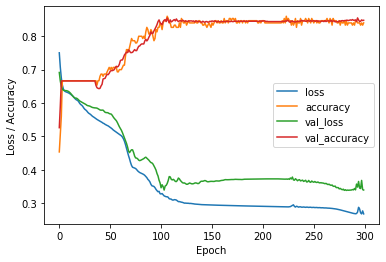

1250/1250 [==============================] - 2s 2ms/step


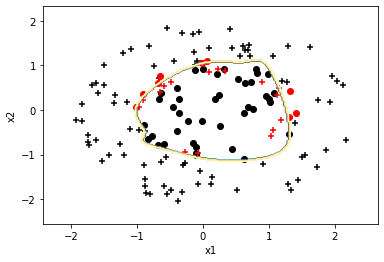

CPU times: total: 19.3 s
Wall time: 19.4 s


In [9]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn3(150)
x_val, d_val = syn3(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [3,3,1],                      # number of nodes in hidden layer
         'drop_nod': 0.0,                  # fraction of the input units to drop
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',               # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.07 ,                    # learningrate
         'num_out' : 1 }              # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_ex2 = mlp(**INPUT)

# Print a summary of the model
model_ex2.summary()

# Train the model
estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                      epochs = 300,      
                      validation_data=(x_val, d_val),
                      batch_size = x_trn.shape[0],      # Batch size = all data (batch learning)
                      #batch_size=50,                   # Batch size for true SGD
                      verbose = 0)

# Call the stats function to print out statistics for classification problems
stats_class(x_trn, d_trn, 'Training', model_ex2)
stats_class(x_val, d_val, 'Validation', model_ex2)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex2.history.keys():
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_trn, d_trn, model_ex2)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
#decision_b(x_val, d_val)


### CellName: Ex3 (#10)
### CellType: Exercise
### Cell instruction: Instruction for question 6-9

Now we are going to look at a regression problem. The data as described above (regr1) consists of 6 inputs (features) and one output (target) value. As for previous examples a new data set is generated each time you call the *regr1* function. To get exactly the same data set between different calls, use a fixed seed. New for this problem is that one can also control the amount of noise added to the target value. We are going to use a relatively small training dataset (250) and a larger validation dataset (1000) to get a more robust estimation of the generalization performance. For regression problems we also need new performance measures. The *stats_reg* function will give you two such measures:
* MSE = mean squared error (low error mean good performance)
* CorrCoeff = Pearson correlation coefficient for the scatter plot between predicted and true values.

The cell below can be used as an template for all questions regarding this regression problem.

#### Question 6
Use 250 data points for training and about 1000 for validation and **no** added noise. Train an MLP to predict the target output. If you increase the complexity of the model (e.g. increasing the number of hidden nodes and/or adding more hidden layers) you should be able to reach a very small training error. Examine what happens with the validation error when you do that! **Discuss your findings!**

**Note 1:** As with previous examples you may need to tune the optimization parameters to make sure that you have "optimal" training. That is, increase or decrease the learningrate, possibly train longer times (increase *epochs*) and change the *batch_size* parameter.

**Note 2:** Make sure to train until you are "sure" that both training and validation error have reach a stable value.

#### Question 7
Use the same training and validation data sets as above, but add 0.4 units of noise (set the second parameter when calling the *regr1* function to 0.4 for both training and validation). Now train again, starting with a "small" model and increase the number of hidden nodes, in a single hidden layer, as you monitor the validation result for each model. **How large model do you need in order to see overtraining?** Make a note of the best validation error you obtained.


#### Question 8
Instead of using the number of hidden nodes to control the complexity it is often better to use a regularization term added to the error function. You are now going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell) to a network that you know is overfitted. You should modify the *L2* value until you find the optimal validation performance. **Present your opitmal model (L2 value and number of hidden nodes). Do you obtain a better result compared to Question 7?**

#### Question 9
Instead of using the *L2* regularizer you can use dropout. Repeat the same exericise are for question 8, but experiment with the *dropout* parameter instead. **Discuss your findings!** 

#### Question 6 Answer

3 nodes:  Train 0.1299, val  0.3363
5 nodes:  Train 0.0605, val 0.25
5,2 nodes:  Train 0.0429, val 0.2298
5, 5, 2 nodes: Train 0.0468, val 0.2867
10, 5, 2 nodes: Train 0.0053, val 0.1151
10, 10, 5 nodes: Train  0.0031, val  0.0932
30, 20, 10 nodes: Train  0.0007, val 0.0968
50, 30, 20, 10 nodes: Train 0.0001, val 0.1289

Discussion: It seems that the Training and validation data lays very close along a function with very little noise, until a 10,10,5 nodes (3layers), we get better and better results meaning we underfitted before and after with more nodes we get a slight over fitting(so slight can it even be called overfitting?), the data and model is more pround to underfitting than overfitting, indicated no noise
#### Question 7 Answer
4 nodes, 0.2895-0.38, is the best validation error, already noting overfitting at 5 nodes WITH 0.3892

#### Question 8 Answer

No significant improvment was detected but a slight one with with L2 = 0.005, 8 nodes with error 0.3368
#### Question 9 Answer
8,2 L = 0.005  val 0.3709


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 6)]               0         
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
32/32 [==============================] - 0s 2ms/step

 ########## STATISTICS for Training Data ########## 

MSE             0.1694
CorrCoeff       0.9181

 #######################################

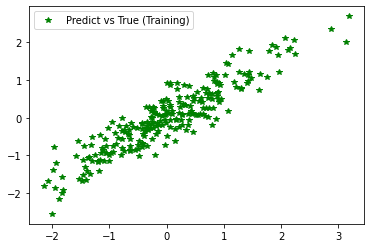

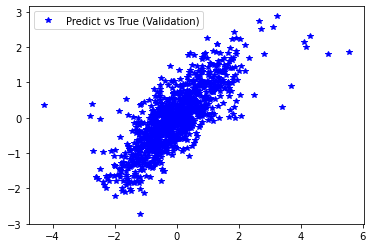

CPU times: total: 54.5 s
Wall time: 54.5 s


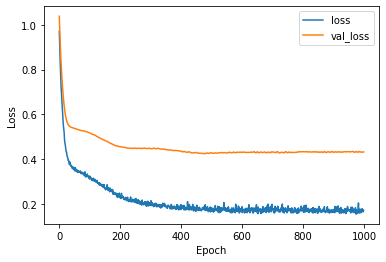

In [10]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 10
np.random.seed(seed) if seed else None

# Generate training and validation data
x_trn, d_trn = regr1(250, 0.4) # 250 data points with no noise
x_val, d_val = regr1(1000, 0.4)

# Standardization of both inputs and targets
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

mu, std = standard(d_trn)
d_trn = (d_trn - mu) / std
d_val = (d_val - mu) / std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [6],                  # number of nodes in hidden layer
         'drop_nod': 0.004,                  # fraction of the input units to drop
         'act_fun': 'tanh',              # activation functions for the hidden layer
         'out_act_fun': 'linear',        # output activation function
         'opt_method': 'Adam',           # minimization method
         'cost_fun': 'mse',              # error function
         'lr_rate': 0.005,               # learningrate
         'lambd' : 0.0,                  # L2
         'num_out' : 1 }  # if binary --> 1 |  regression--> num output | multi-class--> num of classes

# Get the model
model_ex3 = mlp(**INPUT)

# Print a summary of the model
model_ex3.summary()

# Train the model
estimator_ex3 = model_ex3.fit(x_trn, d_trn,
                      epochs = 1000,                     
                      validation_data=(x_val,d_val),
                      batch_size=150,                    
                      verbose = 0)

# Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
pred_trn = model_ex3.predict(x_trn).reshape(d_trn.shape)
pred_val = model_ex3.predict(x_val).reshape(d_val.shape)
stats_reg(d_trn, pred_trn, 'Training', estimator_ex3)
stats_reg(d_val, pred_val, 'Validation', estimator_ex3)

# Scatter plots of predicted and true values
plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()


# Training history
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Epoch')
for k in ['loss', 'val_loss']:
    plt.plot(estimator_ex3.history[k], label = k) 
plt.legend(loc='best')

### CellName: Ex4 (#11)
### CellType: Exercise
### Cell instruction: Instruction for question 10-11

For this exercise you are given a classification problem with a fixed training-, validation- and test dataset. The data is the Japanse vowels dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We provide less code here, possible normalization of the input data and the definition of the MLP is missing. You need to provide that on your own.

#### Question 10
**Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.**

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

#### Question 11
The typical goal is to have a high accuracy (i.e. the fraction of correctly classified cases). During training we typically monitor possible overfitting by looking at the *log loss* of the validation data, since this is the error used during training. One can however have a situation where the log loss increases for the validation data but the accuracy does not decrease (**why?**). **Given this situation, how would select your optimal model?** 


In [12]:
%%time

# Load the data
x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()
# YOUR CODE FOR NORMALIZATION
# Standardization of both inputs and targets


num_classes = 9

# YOUR CODE THAT DEFINES THE MLP
# INPUT = 
# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

INPUT = {'inp_dim': x_trn.shape[1],         
        'n_nod': [5],                      # number of nodes in hidden layer
        'drop_nod': 0.005,                  # fraction of the input units to drop 
        'act_fun': 'tanh',                 # activation functions for the hidden layer
        'out_act_fun': 'softmax',          # output activation function
        'opt_method': 'Adam',               # minimization method
        'cost_fun': 'categorical_crossentropy', # error function
        'lr_rate': 0.05,   # learningrate
        'lambd' : 0.001,                  # L2
        'num_out' : 9 } # if binary --> 1 |  regression--> num inputs | multi-class--> num of classe

# Get the model
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      epochs = 500,     
                      validation_data=(x_val,d_val),
                      batch_size=50,          
                      verbose = 0)

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_vowels.history.keys():
    plt.plot(estimator_vowels.history[k], label = k) 
plt.legend()
plt.show()

# Plot the confusion matrix
make_cm_plot(model_vowels, x_tst, d_tst, num_classes, 'Test data')

FileNotFoundError: [Errno 2] No such file or directory: 'ae.train'

### CellName: Ex5 (#12)
### CellType: Exercise
### Cell instruction: Instruction for question 12

For this exercise you are given a classification problem with a fixed training and test dataset. The data is the Bioconcentraion dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We do not provide any python code for this question, only the small part that reads the data (next code cell).

#### Question 12
**Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.** For this classification task there are not so many cases of class 2. In the training data there is: class 1: 345 cases, class 2: 48 cases, and class 3: 191 cases. One can end upp with situations that the network does not at all learn how to detect cases of class 2. **What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?**  

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
Since there is no defined validation data set you need to split your original training data into training and validation data. You can use *sklearn.model_selection.train_test_split* or *sklearn.model_selection.KFold* to accomplish that, where the latter method does k-fold crossvalidation splits.

**Hint 3:** 
This problem is a 3-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

#### Question 12 Answer:

the confusion matrix gives a good indicator on which classes within the ANN train well and do not do well

In [ ]:
import sklearn
##### %%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

# Load Bioconcentration training and test data
x_trn, d_trn, x_tst, d_tst = bcf()
x_trn, x_val = sklearn.model_selection.train_test_split(x_trn)
d_trn, d_val = sklearn.model_selection.train_test_split(d_trn)
# YOUR CODE HERE
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

num_classes = 3

# YOUR CODE THAT DEFINES THE MLP
# INPUT = 


INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [5,5],                      # number of nodes in hidden layer
         'drop_nod': 0.005,                  # fraction of the input units to drop     
         'act_fun': 'relu',                 # activation functions for the hidden layer
         'out_act_fun': 'softmax',          # output activation function
         'opt_method': 'Adam',               # minimization method
         'cost_fun': 'categorical_crossentropy', # error function
         'lr_rate': 0.005,   # learningrate
         'lambd' : 0.002,                  # L2
         'num_out' : 3 } # if binary --> 1 |  regression--> num inputs | multi-class--> num of classe
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      epochs = 500,     
                      validation_data=(x_val,d_val),
                      batch_size= 50,          
                      verbose = 0)

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_vowels.history.keys():
    plt.plot(estimator_vowels.history[k], label = k) 
plt.legend()
plt.show()
make_cm_plot(model_vowels, x_tst, d_tst, 3, 'Test data')

### CellName: Ex6 (#13)
### CellType: Exercise
### Cell instruction: Instruction for question 13

For this exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test data) with as small as possible model, in terms of the number of trainable weights. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try! The data is randomly generated and I suggest at least 1000 data points to get "good" spirals.

#### Question 13
**Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.**

In [ ]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None
    
# Generate training data
x_trn, d_trn = twospirals(1000, 3, 0)

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std
# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [20,20,10],              # number of nodes in the hidden layers
         'drop_nod': 0.0,                  # fraction of the input units to drop
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.005,                 # learningrate
         'num_out' : 1 }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_ex6 = mlp(**INPUT)

# Print a summary of the model
model_ex6.summary()

# Train the model
estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                      epochs = 500,                
                      batch_size=100,                   
                      verbose = 0)

# Call the stats function to print out statistics for the training
stats_class(x_trn, d_trn, 'Training', model_ex6)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
for k in estimator_ex6.history.keys():
    plt.plot(estimator_ex6.history[k], label = k) 
plt.legend(loc='best')


# Show the decision boundary
decision_b(x_trn, d_trn, model_ex6)


# The report!


### Name

Luca Bernecker

### Introduction

The Programing exercise was split up into 6 sections, where we investigated different systems, from binary classification to regression.

Throughout the different system, different hyperparameters were tested and their influence and "weight" were noted.
Significant differences were seen as well surprising observations were made, which were a valuable addition to the lectures.

### Answers to questions

#### Question 1 ANSWER:

A single note, means that there is only one layer which allows only to represent linear seperable functions. Due to us only having one linear decision plane it can be done by one node
#### Question 2 Answer
Accuracy        0.8660
Loss            0.3089
#### Question 3 Answer

10 nodes
8 nodes with 0.7 learning rate instead of 0.07
#### Question 4 Answer

1 node

#### Question 5 Answer
3,3,1 gives 0.83-0.8550 accuracy, where 3 nodes are stable at 0.85
 
 3 are minimum needed so 3 decision planes can form a "triangle" to close in one "data point type" and make a clear seperation. 



#### Question 6 Answer

3 nodes:  Train 0.1299, val  0.3363
5 nodes:  Train 0.0605, val 0.25
5,2 nodes:  Train 0.0429, val 0.2298
5, 5, 2 nodes: Train 0.0468, val 0.2867
10, 5, 2 nodes: Train 0.0053, val 0.1151
10, 10, 5 nodes: Train  0.0031, val  0.0932
30, 20, 10 nodes: Train  0.0007, val 0.0968
50, 30, 20, 10 nodes: Train 0.0001, val 0.1289

Discussion: It seems that the Training and validation data lays very close along a function with very little noise, until a 10,10,5 nodes (3layers), we get better and better results meaning we underfitted before and after with more nodes we get a slight over fitting(so slight can it even be called overfitting?), the data and model is more pround to underfitting than overfitting, indicated no noise
#### Question 7 Answer
4 nodes, 0.2895-0.38, is the best validation error, already noting overfitting at 5 nodes WITH 0.3892

#### Question 8 Answer

No significant improvment was detected but a slight one with with L2 = 0.005, 8 nodes with error 0.3368
#### Question 9 Answer
8,2 L = 0.005  val 0.3709
#### Question 10
no normalization
         'n_nod': [7],                      
         'drop_nod': 0.005,                  # fraction of the input units to drop
     
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',               # minimization method
         'cost_fun': 'mse', # error function
         'lr_rate': 0.025,   # learningrate
         'lambd' : 0.001,                  # L2
         'num_out' : 9 } # if binary --> 1 |  regression--> num inputs | multi-class--> num of classe

accuracy 0.8713 

#### Question 11

loss measures a difference between raw prediction (float) and class, while accuracy measures difference between thresholded prediction and class. Therefore, if raw predictions change, the loss changes but the accuracy is somewhat more resistant.
This means that accuracy and loss are not exactly inversly correlated.

This could be due to overtraining
I think the accuracy is a better indicator than the validation in this case, but personally I would include a test set, which is more independent then the validation.

#### Question 12 Answer:
The confusion matrix gives a good indicator on which classes within the ANN train well and do not do well
#### Question 13 Answer:
nodes: 20,20,10
 learning rate 0.005,
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
### Summary
  
  
In the computer exercise interesting observations were made.
One and probably the most astoudning observation was that in Question 11 we are supposed to use normalization for the results, but with normalization I only resulted in max accuracy of 0.4 and without over 0.8. Additionally, changing for a multi class problem the output function to softmax, which according to exertnal sources is the preferd function, did show no significant improvments.
This leads to another observation, that regularization and dropout did by far not influence the results as much as expected and the mayor contributer to different results were the width and depth of the MLP.

Lastly, 
it was interesting to see that running the same system twice could have immense different results beign up to 0.2 in accuracy.
## Correction
#### Question10:
without normalization:
0.9 Accuracy
INPUT = {'inp_dim': x_trn.shape[1],         
        'n_nod': [5],                      # number of nodes in hidden layer
        'drop_nod': 0.005,                  # fraction of the input units to drop
     
        'act_fun': 'tanh',                 # activation functions for the hidden layer
        'out_act_fun': 'softmax',          # output activation function
        'opt_method': 'Adam',               # minimization method
        'cost_fun': 'categorical_crossentropy', # error function
        'lr_rate': 0.05,   # learningrate
        'lambd' : 0.001,                  # L2
        'num_out' : 9 } # if binary --> 1 |  regression--> num inputs | multi-class--> num of classe

with normalization:
0.34 Accuracy
and 
Standardization of inputs:
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

#### Question 12:

INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [5],                      # number of nodes in hidden layer
      
      'drop_nod': 0.005,                  # fraction of the input units to drop     
       
       'act_fun': 'relu',                 # activation functions for the hidden layer
       
       'out_act_fun': 'softmax',          # output activation function
       
       'opt_method': 'Adam',               # minimization method
        
        'cost_fun': 'categorical_crossentropy', # error function
        
        'lr_rate': 0.005,   # learningrate
       
       'lambd' : 0.002,                  # L2
        
        'num_out' : 3 } # if binary --> 1 |  regression--> num inputs | multi-class--> num of classe
         
accuracy: 0.56


where normalizing did not increase accuracy.